In [1]:
import pandas as pd
import numpy as np
from calculator import *
from numpy import random
from math import pi
import turtle as tt
import matplotlib.cm as cm
from tqdm import tqdm
import matplotlib.pyplot as plt
import statsmodels.api
import pandas as pd
import pingouin as pg
from statsmodels.tsa.stattools import *
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller
from sklearn import linear_model

In [8]:
arsenic = pd.read_csv("data/arsenic.csv")
copper = pd.read_csv("data/copper.csv")
sulfate = pd.read_csv("data/sulfate.csv")
boron = pd.read_csv("data/boran.csv")
chloride = pd.read_csv("data/chloride.csv")
molybdenum = pd.read_csv("data/molybdenum.csv")
vanadium = pd.read_csv("data/vanadium.csv")
fluoride = pd.read_csv("data/fluoride.csv")
# iron = pd.read_csv("data/iron.csv")
# uranium = pd.read_csv("data/uranium.csv")

In [9]:
fluoride.describe()

,WellDepth,Time,SampleNumber,EntityId,LabId,ReliabilityId,LatitudeDD,LongitudeDD,ParameterCode,ParameterValue,PlusMinus
count,1642.000000,1653.000000,1676.0,1676.000000,1676.000000,1674.000000,1676.000000,1676.000000,1676.0,1676.000000,0.0
mean,1074.350183,1187.298246,1.0,1.869332,23.245227,7.002987,30.571620,-96.885039,950.0,0.471768,NaN
std,896.312917,265.184967,0.0,2.969334,1.501882,0.839472,1.538809,1.804169,0.0,0.876017,NaN
min,20.000000,0.000000,1.0,1.000000,1.000000,1.000000,27.474722,-100.120833,950.0,0.000000,NaN
25%,460.250000,1000.000000,1.0,1.000000,23.000000,7.000000,29.043472,-98.519050,950.0,0.140000,NaN
50%,771.000000,1145.000000,1.0,1.000000,23.000000,7.000000,30.729444,-96.714167,950.0,0.280000,NaN
75%,1350.000000,1408.000000,1.0,1.000000,23.000000,7.000000,31.949861,-95.267167,950.0,0.460000,NaN
max,6211.000000,1830.000000,1.0,16.000000,31.000000,14.000000,33.357778,-93.776667,950.0,11.100000,NaN


In [10]:
# arsenic_df = pre_process(arsenic,["arsenic"],thres = 2.75)
# copper_df = pre_process(copper,["copper"],thres = 4.91)
# sulfate_df = pre_process(sulfate,["sulfate"],thres = 60.34)
# boron_df = pre_process(boron,["boron"],thres = 418.79)
# chloride_df = pre_process(chloride,["chloride"],thres = 96.95)
# molybdenum_df = pre_process(molybdenum,["molybdenum"],thres = 2.87)
# vanadium_df = pre_process(vanadium,["vanadium"], thres = 3.12)
eps = 1e-5
arsenic_df = pre_process(arsenic,["arsenic"],thres = 2-eps)
copper_df = pre_process(copper,["copper"],thres = 2-eps)
sulfate_df = pre_process(sulfate,["sulfate"],thres = 28.6-eps)
boron_df = pre_process(boron,["boron"],thres = 200-eps)
chloride_df = pre_process(chloride,["chloride"],thres = 34.8-eps)
molybdenum_df = pre_process(molybdenum,["molybdenum"],thres = 1-eps)
vanadium_df = pre_process(vanadium,["vanadium"], thres = 1-eps)
fluoride_df = pre_process(fluoride,["fluoride"],thres = 0.28-eps)
# iron_df = pre_process(iron,["iron"],thres = 170-eps)
# eps=10e-5
# arsenic_df = pre_process(arsenic,["arsenic"],thres = 10/3-eps)
# copper_df = pre_process(copper,["copper"],thres = 1.3/3-eps)
# sulfate_df = pre_process(sulfate,["sulfate"],thres = 250/3-eps)
# boron_df = pre_process(boron,["boron"],thres = 5/3-eps)
# chloride_df = pre_process(chloride,["chloride"],thres = 21/3-eps)
# molybdenum_df = pre_process(molybdenum,["molybdenum"],thres = 40/3-eps)
# vanadium_df = pre_process(vanadium,["vanadium"], thres = 4/3-eps)

In [11]:
fluoride_df.head()

,StateWellNumber,Date,LatitudeDD,LongitudeDD,ParameterValue,type
433,3709505,20020304,31.825833,-94.918889,0.35,fluoride
532,3735701,20020305,31.398889,-94.726944,0.53,fluoride
538,3735904,20020305,31.386945,-94.646667,0.34,fluoride
454,3713407,20020306,31.832222,-94.479722,0.38,fluoride
517,3734505,20020306,31.421389,-94.803333,0.32,fluoride


In [12]:
# typess = [["zero_arsenic","moderate_arsenic",'high_arsenic'],["zero_copper","moderate_copper",'high_copper'],\
#          ["zero_sulfate","moderate_sulfate",'high_sulfate'],["zero_boran","moderate_boran",'high_boran'],\
#          ["zero_chloride","moderate_chloride",'high_chloride'],["zero_molybdenum","moderate_molybdenum",'high_molybdenum'],\
#          ["zero_vanadium","moderate_vanadium",'high_vanadium']]
typess = ["arsenic","copper","sulfate","boron","chloride","molybdenum","vanadium","fluoride"]
l = [arsenic_df,copper_df,sulfate_df,boron_df,chloride_df,molybdenum_df,vanadium_df,fluoride_df]

In [19]:
df = get_dates(arsenic)
df['year'] =  df['Date']/10000
df['year'] = df['year'].astype('int')
df = df[df['year']==2002]
date1 = df['Date']

df = get_dates(vanadium)
df['year'] =  df['Date']/10000
df['year'] = df['year'].astype('int')
df = df[df['year']==2002]
date2 = df['Date']

dates = np.intersect1d(date1,date2)

In [20]:
len(dates)

92

In [21]:
sum_vec=[]
for i in range(len(l)):
    l[i] = vectorize(l[i],typess[i],dates=dates)
    if i==0:
        sum_vec = l[0]
    if i>=1:
        sum_vec = add_vectorization(sum_vec,l[i])

In [22]:
## todo 
## sum_vec is a list of dataframe with len 92
## i-th dataframe contains all the objects on date i
sum_vec[1]

,type,x,y
0,arsenic,-94.726944,31.398889
1,arsenic,-94.646667,31.386945
2,arsenic,-94.840000,31.815001
3,arsenic,-94.616112,31.718889
4,arsenic,-94.665001,31.763889
5,arsenic,-94.670556,31.438611
6,arsenic,-94.552501,31.779444
7,copper,-94.646667,31.386945
8,copper,-94.665001,31.763889
9,copper,-94.616112,31.718889


In [23]:
from itertools import chain, combinations

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(1,len(s)+1))

In [24]:
list(powerset([1,2,3]))

[(1,), (2,), (3,), (1, 2), (1, 3), (2, 3), (1, 2, 3)]

In [25]:
    colo = list(powerset(typess))[10]
    print(colo)
    PI = []
    for date in range(len(dates)):
        if not (all(x in list(sum_vec[date]['type']) for x in list(colo))):
            print(list(sum_vec[date]['type'].unique()))

('arsenic', 'boron')
['arsenic', 'copper', 'molybdenum', 'vanadium']
['arsenic', 'copper', 'sulfate', 'molybdenum', 'vanadium']
['arsenic', 'copper', 'sulfate', 'molybdenum', 'vanadium']
['arsenic', 'copper', 'sulfate', 'chloride', 'molybdenum', 'vanadium']
['arsenic', 'sulfate', 'molybdenum', 'vanadium']
['arsenic', 'sulfate', 'molybdenum', 'vanadium']
['arsenic', 'sulfate', 'molybdenum', 'vanadium']
['arsenic', 'molybdenum', 'vanadium']
['arsenic', 'copper', 'chloride', 'molybdenum', 'vanadium', 'fluoride']
['arsenic', 'copper', 'chloride', 'molybdenum', 'vanadium']
['arsenic', 'sulfate', 'chloride', 'molybdenum', 'vanadium']
['arsenic', 'copper', 'sulfate', 'molybdenum', 'vanadium']
['arsenic', 'copper', 'molybdenum', 'vanadium']


In [38]:
# first find colocation pattern
thres = 0.7
patterns = []
num_colos = dict()
diff_colos = dict()
PIs = [] 
PI_df = pd.DataFrame()
colo_df = pd.DataFrame()
for colo in list(powerset(typess)):
    PI = []
    num_colo = []
    for date in range(len(dates)):
        if not (all(x in list(sum_vec[date]['type']) for x in list(colo))):
            PI.append(0)
            num_colo.append(0)
            continue
        arr=sum_vec[date].to_numpy()
        dic=get_dict(arr,key_idx=0)
        colo_array=get_colocations(dic,colo_type=list(colo),thres=0.001)
        if colo_array is None: 
            num_colo.append(0)
        else: 
            num_colo.append(len(colo_array))
        PI.append(get_modified_part_index(dic,colo_type=list(colo),colo_arr=colo_array))
    if np.mean(PI)>=thres:
        #print(colo)
        PI_df[str(colo)] = PI
        colo_df[str(colo)] = num_colo
        print("{} with PI = {}".format(str(colo),np.mean(PI)))
        PIs.append(np.mean(PI))
        patterns.append(colo)
        num_colos[str(colo)] = num_colo
        diff_colo = np.array(num_colo[1:])-np.array(num_colo[:-1])
        diff_colos[str(colo)] = diff_colo
patterns

('arsenic',) with PI = 1.0
('copper',) with PI = 0.8043478260869565
('sulfate',) with PI = 0.7934782608695652
('boron',) with PI = 0.8586956521739131
('chloride',) with PI = 0.8043478260869565
('molybdenum',) with PI = 1.0
('vanadium',) with PI = 1.0
('fluoride',) with PI = 0.7608695652173914
('arsenic', 'copper') with PI = 0.7864734299516908
('arsenic', 'sulfate') with PI = 0.7789855072463768
('arsenic', 'boron') with PI = 0.8399538866930172
('arsenic', 'chloride') with PI = 0.786322463768116
('arsenic', 'molybdenum') with PI = 0.9831427630340674
('arsenic', 'vanadium') with PI = 0.9831427630340674
('arsenic', 'fluoride') with PI = 0.7412008281573499
('copper', 'molybdenum') with PI = 0.7864734299516908
('copper', 'vanadium') with PI = 0.7864734299516908
('sulfate', 'molybdenum') with PI = 0.7789855072463768
('sulfate', 'vanadium') with PI = 0.7789855072463768
('boron', 'chloride') with PI = 0.7268417874396135
('boron', 'molybdenum') with PI = 0.8399538866930172
('boron', 'vanadium') 

[('arsenic',),
 ('copper',),
 ('sulfate',),
 ('boron',),
 ('chloride',),
 ('molybdenum',),
 ('vanadium',),
 ('fluoride',),
 ('arsenic', 'copper'),
 ('arsenic', 'sulfate'),
 ('arsenic', 'boron'),
 ('arsenic', 'chloride'),
 ('arsenic', 'molybdenum'),
 ('arsenic', 'vanadium'),
 ('arsenic', 'fluoride'),
 ('copper', 'molybdenum'),
 ('copper', 'vanadium'),
 ('sulfate', 'molybdenum'),
 ('sulfate', 'vanadium'),
 ('boron', 'chloride'),
 ('boron', 'molybdenum'),
 ('boron', 'vanadium'),
 ('boron', 'fluoride'),
 ('chloride', 'molybdenum'),
 ('chloride', 'vanadium'),
 ('molybdenum', 'vanadium'),
 ('molybdenum', 'fluoride'),
 ('vanadium', 'fluoride'),
 ('arsenic', 'copper', 'molybdenum'),
 ('arsenic', 'copper', 'vanadium'),
 ('arsenic', 'sulfate', 'molybdenum'),
 ('arsenic', 'sulfate', 'vanadium'),
 ('arsenic', 'boron', 'chloride'),
 ('arsenic', 'boron', 'molybdenum'),
 ('arsenic', 'boron', 'vanadium'),
 ('arsenic', 'boron', 'fluoride'),
 ('arsenic', 'chloride', 'molybdenum'),
 ('arsenic', 'chloride

In [37]:
len(patterns)

17

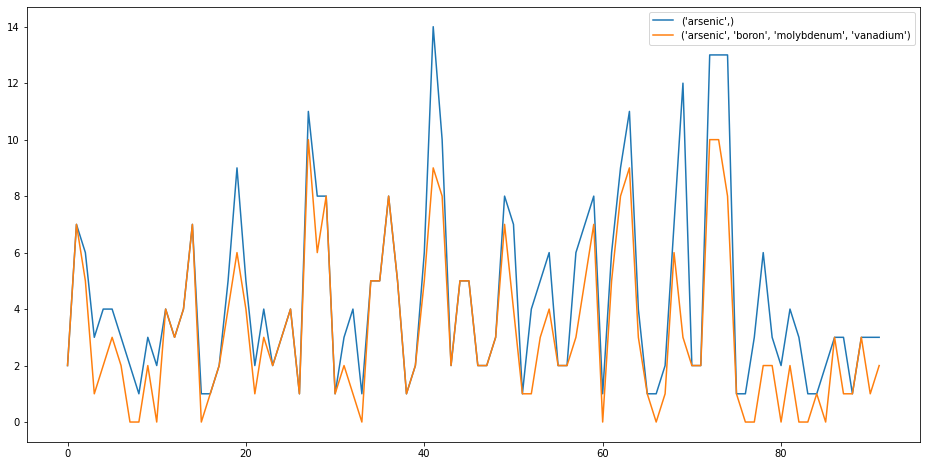

In [16]:
plt.figure(figsize = (16,8))
for colo in list(tt):
    plt.plot(colo_df[str(colo)],label = str(colo))
plt.legend()
plt.show()

In [17]:
guo_index = "('arsenic',)"
guo = np.reshape(num_colos[guo_index],(-1,1))
guo = guo[1:]-guo[:-1]
select_time_lags(guo)

4

In [17]:
guo_index = "('arsenic',)"
guo = np.reshape(num_colos[guo_index],(-1,1))
guo = guo[1:]-guo[:-1]
causes = []
for colo in patterns:
    colo = str(colo)
    if colo!=guo_index:
        yin = np.reshape(num_colos[colo],(-1,1))
        yin = yin[1:]-yin[:-1]
        df = np.concatenate((guo,yin),axis=1)
        lags = select_time_lags(yin)
        results = grangercausalitytests(df, maxlag=[lags])
        if (results[lags])[0]['ssr_ftest'][1]<=0.1:
            causes.append(colo)


Granger Causality
number of lags (no zero) 8
ssr based F test:         F=0.6776  , p=0.7094  , df_denom=66, df_num=8
ssr based chi2 test:   chi2=6.8172  , p=0.5565  , df=8
likelihood ratio test: chi2=6.5516  , p=0.5857  , df=8
parameter F test:         F=0.6776  , p=0.7094  , df_denom=66, df_num=8

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.7312  , p=0.0349  , df_denom=78, df_num=4
ssr based chi2 test:   chi2=12.1854 , p=0.0160  , df=4
likelihood ratio test: chi2=11.4042 , p=0.0224  , df=4
parameter F test:         F=2.7312  , p=0.0349  , df_denom=78, df_num=4

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.0593  , p=0.3824  , df_denom=78, df_num=4
ssr based chi2 test:   chi2=4.7262  , p=0.3166  , df=4
likelihood ratio test: chi2=4.6023  , p=0.3306  , df=4
parameter F test:         F=1.0593  , p=0.3824  , df_denom=78, df_num=4

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.4154  , p=0.2367  , df_d

In [18]:
causes

["('boron',)",
 "('arsenic', 'boron')",
 "('boron', 'molybdenum')",
 "('boron', 'vanadium')",
 "('arsenic', 'boron', 'molybdenum')",
 "('arsenic', 'boron', 'vanadium')",
 "('boron', 'molybdenum', 'vanadium')",
 "('arsenic', 'boron', 'molybdenum', 'vanadium')"]

In [88]:
truth = [True,True,True,True,True,True,False,False]

In [89]:
dd = {"Granger": causes,"direct":truth}
ddd = pd.DataFrame(dd)
ddd

,Granger,direct
0,"('sulfate',)",True
1,"('boron',)",True
2,"('chloride',)",True
3,"('arsenic', 'sulfate')",True
4,"('arsenic', 'boron')",True
5,"('arsenic', 'chloride')",True
6,"('sulfate', 'boron')",False
7,"('arsenic', 'sulfate', 'boron')",False


In [24]:
yin = np.reshape(num_colos["('arsenic',)"],(-1,1))
guo = np.reshape(num_colos["('arsenic', 'boron')"],(-1,1))
yin = yin[1:]-yin[:-1]
guo = guo[1:]-guo[:-1]
df = np.concatenate((yin,guo),axis=1)

In [25]:
select_time_lags(yin)

4

In [26]:
grangercausalitytests(df, maxlag=10)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2932  , p=0.2586  , df_denom=87, df_num=1
ssr based chi2 test:   chi2=1.3378  , p=0.2474  , df=1
likelihood ratio test: chi2=1.3280  , p=0.2492  , df=1
parameter F test:         F=1.2932  , p=0.2586  , df_denom=87, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.3794  , p=0.0988  , df_denom=84, df_num=2
ssr based chi2 test:   chi2=5.0420  , p=0.0804  , df=2
likelihood ratio test: chi2=4.9043  , p=0.0861  , df=2
parameter F test:         F=2.3794  , p=0.0988  , df_denom=84, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.3630  , p=0.0773  , df_denom=81, df_num=3
ssr based chi2 test:   chi2=7.7016  , p=0.0526  , df=3
likelihood ratio test: chi2=7.3830  , p=0.0606  , df=3
parameter F test:         F=2.3630  , p=0.0773  , df_denom=81, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.9497  , p=0.0252  , df_d

{1: ({'ssr_ftest': (1.2932045148994753, 0.2585806198620325, 87.0, 1),
   'ssr_chi2test': (1.33779777403394, 0.24742270885482764, 1),
   'lrtest': (1.3279524239401894, 0.24916981056668486, 1),
   'params_ftest': (1.2932045148994329, 0.25858061986204134, 87.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.3793567386124184, 0.09882528379082714, 84.0, 2),
   'ssr_chi2test': (5.041970231821553, 0.08038038373907955, 2),
   'lrtest': (4.904327619896321, 0.08610706544926804, 2),
   'params_ftest': (2.3793567386124197, 0.09882528379082665, 84.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (2.3629811887858905, 0.07727288311446764, 81.0, 3),
   'ssr_chi2test': (7.701568319005866, 0.052599333575479607, 3),
   'lrtest': (7.3830127109043815, 0.06064178725518183, 3),
   'params_ftest': (2.362981188785882, 0.07727288311446877, 81.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 

In [42]:
lags = select_time_lags(yin)
results = grangercausalitytests(df, maxlag=[lags])
results


Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.3012  , p=0.2770  , df_denom=78, df_num=4
ssr based chi2 test:   chi2=5.8053  , p=0.2142  , df=4
likelihood ratio test: chi2=5.6198  , p=0.2294  , df=4
parameter F test:         F=1.3012  , p=0.2770  , df_denom=78, df_num=4


{4: ({'ssr_ftest': (1.3011897365767326, 0.2769604991237684, 78.0, 4),
   'ssr_chi2test': (5.805308055496191, 0.21416743011974315, 4),
   'lrtest': (5.619827498682412, 0.22939561296419672, 4),
   'params_ftest': (1.3011897365767378, 0.2769604991237663, 78.0, 4.0)},
   array([[0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 1., 0.]])])}

In [67]:
#get p-value of granger causality test
(results[4])[0]['ssr_ftest'][1]

0.004155445975629328

In [55]:
grangercausalitytests(df, maxlag=10)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0535  , p=0.8176  , df_denom=87, df_num=1
ssr based chi2 test:   chi2=0.0554  , p=0.8140  , df=1
likelihood ratio test: chi2=0.0553  , p=0.8140  , df=1
parameter F test:         F=0.0535  , p=0.8176  , df_denom=87, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2866  , p=0.7516  , df_denom=84, df_num=2
ssr based chi2 test:   chi2=0.6072  , p=0.7381  , df=2
likelihood ratio test: chi2=0.6052  , p=0.7389  , df=2
parameter F test:         F=0.2866  , p=0.7516  , df_denom=84, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3952  , p=0.7568  , df_denom=81, df_num=3
ssr based chi2 test:   chi2=1.2882  , p=0.7319  , df=3
likelihood ratio test: chi2=1.2788  , p=0.7342  , df=3
parameter F test:         F=0.3952  , p=0.7568  , df_denom=81, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.2158  , p=0.9289  , df_d

{1: ({'ssr_ftest': (0.05350595252279672, 0.8176143835858538, 87.0, 1),
   'ssr_chi2test': (0.0553509853684104, 0.8140008070272722, 1),
   'lrtest': (0.05533397161281073, 0.8140288719265617, 1),
   'params_ftest': (0.053505952522780134, 0.8176143835858861, 87.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.28656299479098546, 0.7515708324434764, 84.0, 2),
   'ssr_chi2test': (0.607240631818993, 0.7381410736743339, 2),
   'lrtest': (0.6051784269982932, 0.7389025652350032, 2),
   'params_ftest': (0.286562994790993, 0.751570832443473, 84.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.3952327220421422, 0.7567665173112876, 81.0, 3),
   'ssr_chi2test': (1.2881659088780932, 0.7319450986083647, 3),
   'lrtest': (1.2788286724706381, 0.7341664514291393, 3),
   'params_ftest': (0.39523272204214505, 0.7567665173112876, 81.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0.,

In [30]:
pacf = statsmodels.tsa.stattools.pacf(yin)
pacf

array([ 1.        , -0.26634513, -0.41448164, -0.27876701, -0.32812782,
       -0.07695989, -0.16502999, -0.13954905, -0.3058271 ,  0.08497297,
        0.14815018,  0.15747823, -0.29483484, -0.06697657, -0.04206294,
        0.12351361, -0.19783228, -0.06218909,  0.22208825, -0.07666888])

In [20]:
thres = 0.1
for i in range(len(pacf)):
    if abs(pacf[i])<=thres:
        return i+1

SyntaxError: 'return' outside function (162891836.py, line 4)

In [ ]:
x = np.array(num_colos["('sulfate',)"])
y = np.array(num_colos["('arsenic', 'boron', 'chloride')"])
z = np.array(num_colos["('arsenic', 'sulfate')"])
x = x[1:]-x[:-1]
y = y[1:]-y[:-1]
z = z[1:]-z[:-1]
dic = {'x':x,'y':y,'z':z} 
cov_df = pd.DataFrame(dic,columns = ['x','y','z'])
# test x y z and z y x
pg.partial_corr(data=cov_df, x='z', y='y', covar='x')

In [ ]:
patterns

In [ ]:
X = np.reshape(num_colos["('sulfate',)"],(-1,1))
y = np.reshape(num_colos["('arsenic',)"],(-1,1))
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [ ]:
lm.score(y,X)

In [ ]:
select_time_lags(yin)

In [22]:
df = pd.DataFrame(diff_colos)

In [24]:
df.head()

,"('arsenic',)","('copper',)","('boron',)","('chloride',)","('molybdenum',)","('vanadium',)","('arsenic', 'boron')","('arsenic', 'molybdenum')","('arsenic', 'vanadium')","('boron', 'molybdenum')","('boron', 'vanadium')","('molybdenum', 'vanadium')","('arsenic', 'boron', 'molybdenum')","('arsenic', 'boron', 'vanadium')","('arsenic', 'molybdenum', 'vanadium')","('boron', 'molybdenum', 'vanadium')","('arsenic', 'boron', 'molybdenum', 'vanadium')"
0,5,4,5,0,5,5,5,5,5,5,5,5,5,5,5,5,5
1,-1,0,-2,1,-1,-1,-2,-1,-1,-2,-2,-1,-2,-2,-1,-2,-2
2,-3,-4,-4,-1,-3,-3,-4,-3,-3,-4,-4,-3,-4,-4,-3,-4,-4
3,1,3,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1
4,0,-3,1,-2,0,0,1,0,0,1,1,0,1,1,0,1,1


In [32]:
dff = pd.DataFrame()
for pattern in causes:
    dff[str(pattern)] = df[str(pattern)]
dff["('arsenic',)"] = df["('arsenic',)"]

In [33]:
dff.head()

,"('boron',)","('arsenic', 'boron')","('boron', 'molybdenum')","('boron', 'vanadium')","('arsenic', 'boron', 'molybdenum')","('arsenic', 'boron', 'vanadium')","('boron', 'molybdenum', 'vanadium')","('arsenic', 'boron', 'molybdenum', 'vanadium')","('arsenic',)"
0,5,5,5,5,5,5,5,5,5
1,-2,-2,-2,-2,-2,-2,-2,-2,-1
2,-4,-4,-4,-4,-4,-4,-4,-4,-3
3,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,0


In [34]:
dff.shape

(91, 9)

In [35]:
dff.to_csv("Data/diff_cause_colos.csv")

In [86]:
df.head(10)

,"('arsenic',)","('copper',)","('sulfate',)","('boron',)","('chloride',)","('arsenic', 'copper')","('arsenic', 'sulfate')","('arsenic', 'boron')","('arsenic', 'chloride')","('boron', 'chloride')","('arsenic', 'boron', 'chloride')"
0,5,4,1,6,0,4,1,6,0,0,0
1,-1,-1,0,-2,1,-1,0,-2,1,1,1
2,-3,-3,0,-4,-1,-3,0,-4,-1,-1,-1
3,1,3,0,1,2,3,0,1,2,2,2
4,0,-3,0,-1,-2,-3,0,-1,-2,-2,-2
5,-1,1,-2,1,1,1,-2,1,1,1,1
6,-1,-1,0,-2,-1,-1,0,-2,-1,-1,-1
7,-1,1,1,0,0,1,1,0,0,0,0
8,2,0,-1,1,0,0,-1,1,0,0,0
9,-1,0,1,-1,0,0,1,-1,0,0,0


In [46]:
colo_PI = {"colo_pattern":patterns,"PI":PIs}

In [47]:
colo_PI_df  = pd.DataFrame(colo_PI)

In [48]:
colo_PI_df[:7]

,colo_pattern,PI
0,"(arsenic,)",1.000000
1,"(copper,)",0.717391
2,"(sulfate,)",0.782609
3,"(boron,)",0.847826
4,"(chloride,)",0.728261
5,"(arsenic, copper)",0.715839
6,"(arsenic, sulfate)",0.768116


In [49]:
colo_PI_df[7:]

,colo_pattern,PI
7,"(arsenic, boron)",0.829990
8,"(arsenic, chloride)",0.718750
9,"(copper, boron)",0.584679
10,"(sulfate, boron)",0.564363
11,"(boron, chloride)",0.684847
12,"(arsenic, copper, boron)",0.584679
13,"(arsenic, sulfate, boron)",0.564363
14,"(arsenic, boron, chloride)",0.684847


In [14]:
dd = pd.DataFrame()
dd["shit"] = [1,2,3]
dd

,shit
0,1
1,2
2,3
